## **Practica 0**
### Aprendizaje automático y big data
---
#### _Alberto García Domenech - Pablo Daurell Marina_

En esta práctica vamos a calcular la integral definida de una función.  
Para ello usaremos el método de Montecarlo: generando varios números aleatorios y aplicando cierta formula podremos calcular el valor aproximado de la integral.   
Implementaremos dos formas de realizar este método:
- Utilizando un bucle ```integra_mc_bucle()```  
- Utilizando operaciones sobre vectores ```integra_mc_vector()```     

Y comprobaremos cuál es más eficiente.

Para empezar, importamos las librerias necesarias:
- **time:** Calcular tiempos de ejecución
- **numpy:** Realizar operaciones con vectores
- **matplotlib.pyplot:** Dibujar gráficas
- **scipy:** Comprobar valor de la integral

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [2]:
# Funcion a integrar (Ej: 2x)
def f(x):
    return (2*x)

### Solución con bucle:
Primero calculamos la integral con un bucle para generar los puntos aleatorios y comprobar su relación respecto a la gráfica de la función.   

In [3]:
def integra_mc_bucle(fun, a, b, num_puntos=10000):
    """Calcula la integral definida de una funcion mediante 
    el metodo MonteCarlo haciendo uso de un bucle"""
    Nunder = 0
    x_range = np.linspace(a, b, num_puntos)
    y_range = fun(x_range)
    maximo = max(y_range)
    minimo = 0

    for i in range(num_puntos):
        x = np.random.uniform(a, b)
        y = np.random.uniform(minimo, maximo)
        if y < fun(x):
            Nunder += 1

    I = ((Nunder / num_puntos) * (b-a) * maximo)
    return I

### Solución con operaciones de vectores:
Ahora volvemos a calcular la integral pero sin un bucle. Generamos los puntos aleatorios creando arrays de numpy con números aleatorios y aplicamos una máscara booleana para averiguar su posición respecto a la gráfica de la función.

In [4]:
def integra_mc_vector(fun, a, b, num_puntos=10000):
    """Calcula la integral definida de una funcion mediante 
    el metodo MonteCarlo haciendo uso de operaciones con vectores"""
    x_range = np.linspace(a, b, num_puntos)
    y_range = fun(x_range)
    maximo = max(y_range)
    minimo = 0
    
    x = np.random.uniform(a, b, num_puntos)
    y = np.random.uniform(minimo, maximo, num_puntos)
    Nunder= np.count_nonzero((y < fun(x)))

    I = ((Nunder / num_puntos) * (b-a) * maximo)
    return I

### Comprobación:  
- ```integrate.quad()``` de la librería **scipy** nos devuelve el valor de la integral.   
- Comprobamos que ```integra_mc_bucle()``` e ```integra_mc_vector()``` devuelven un valor muy cercano.

In [5]:
print(integrate.quad(f, 1, 10))
print(integra_mc_bucle(f,1,10))
print(integra_mc_vector(f,1,10))

(99.0, 1.099120794378905e-12)
98.64000000000001
99.756


### Tiempos:
Comparamos los tiempos de ejecución de la función que hace uso de un bucle y la que hace uso de operaciones con vectores, en función del número de puntos aleatorios generados.

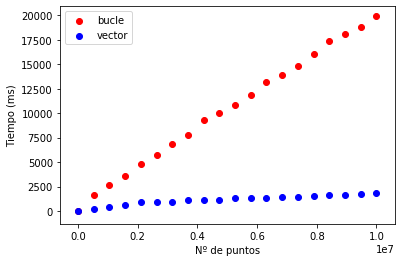

In [9]:
def compara_tiempos(f,a,b):
    """Genera grafica de tiempos """
    sizes = np.linspace(100, 10000000, 20)
    times_bucle = []
    times_vector = []
    for size in sizes:
        tic = time.process_time()
        integra_mc_bucle(f, a, b, int(size))
        toc = time.process_time()
        times_bucle += [1000*(toc-tic)]
        
        tic = time.process_time()
        integra_mc_vector(f, a, b, int(size))
        toc = time.process_time()
        times_vector += [1000*(toc-tic)]

    plt.figure()
    plt.xlabel('Nº de puntos')
    plt.ylabel('Tiempo (ms)')
    plt.scatter(sizes, times_bucle, c='red', label='bucle')
    plt.scatter(sizes, times_vector, c='blue', label='vector')
    plt.legend()
    plt.savefig('tiempos_def.pdf')
    plt.show()
    
compara_tiempos(f,1,10)

### Conclusión:
Como vemos en la gráfica, la función con bucle es mucho menos eficiente que la función con operaciones de vectores. El bucle es mucho más lento cuantos más puntos generemos, mientras que con el uso de vectores el tiempo de ejecución es mucho menor y varía mucho menos.